# Laboratorio 5
- Mark Albrand 21004
- Jimena Hernández 21199

### Task 1
Genere muestras aleatorias a partir de una distribución de probabilidad discreta personalizada mediante el método de aceptación-rechazo.

1. Defina una distribución de probabilidad discreta objetivo con valores y probabilidades especificados.
    
    a. Función = (x**2) / 55

In [1]:
import numpy as np

In [2]:
def p(x):
    """
    Función de probabilidad discreta
    :param x: int
    :return: float
    """
    return (x**2) / 55

2. Elija una distribución de propuesta con un soporte mayor que cubra el soporte de la distribución de destino. 
    
    a. N.B: El "soporte" de una variable aleatoria o distribución de probabilidad se refiere al conjunto de valores para los cuales la variable aleatoria tiene una probabilidad distinta de cero. En otras palabras, es el rango de valores donde la distribución de probabilidad es positiva.

In [3]:
def q(x):
    return 1/11


3. Calcule la constante C para acotar la relación entre el PMF objetivo y el PMF propuesto.

In [4]:
C = max([p(x) / q(x) for x in range(1, 11)])

4. Implemente el método de aceptación-rechazo para generar muestras aleatorias a partir de la distribución
discreta personalizada.

In [5]:
def accept_reject(n, p, q, c):
    """
    Algoritmo de aceptación y rechazo
    :param n: int
    :param p: callable
    :param q: callable
    :param c: float
    :return: list
    """
    result = []
    while len(result) < n:
        x = np.random.randint(0, 11)
        u = np.random.rand()
        if u < p(x) / (c * q(x)):
            result.append(x)
    return result

In [6]:
cantidad = 1000 # Genere una muestra aleatoria de tamaño 1000 a partir de la distribución personalizada.

muestras = accept_reject(cantidad, p, q, C)

print(muestras)

[8, 10, 8, 10, 8, 7, 9, 8, 7, 10, 9, 4, 5, 7, 8, 7, 10, 8, 10, 5, 8, 10, 3, 8, 8, 9, 9, 5, 5, 7, 6, 8, 9, 8, 8, 7, 10, 7, 9, 6, 8, 8, 9, 8, 7, 10, 9, 10, 7, 7, 6, 10, 9, 8, 10, 10, 10, 8, 5, 9, 10, 8, 10, 10, 6, 7, 9, 8, 9, 10, 9, 8, 8, 6, 10, 4, 10, 10, 5, 6, 9, 7, 3, 7, 8, 5, 10, 7, 6, 8, 8, 8, 9, 10, 10, 6, 10, 10, 10, 5, 7, 7, 7, 9, 5, 6, 9, 8, 4, 10, 10, 6, 10, 9, 9, 9, 10, 8, 6, 6, 9, 9, 7, 6, 10, 9, 4, 8, 9, 8, 5, 8, 10, 7, 10, 10, 8, 9, 8, 9, 5, 9, 10, 10, 8, 4, 9, 7, 3, 9, 9, 10, 5, 8, 10, 8, 7, 10, 5, 8, 7, 5, 10, 6, 7, 1, 6, 7, 7, 8, 9, 10, 3, 9, 9, 10, 8, 10, 7, 6, 9, 2, 10, 9, 9, 6, 6, 9, 8, 10, 4, 10, 10, 8, 9, 9, 5, 10, 8, 8, 8, 7, 9, 6, 8, 8, 10, 6, 9, 9, 10, 9, 9, 9, 6, 6, 8, 5, 8, 8, 8, 10, 5, 8, 4, 10, 10, 9, 10, 10, 4, 8, 5, 9, 9, 10, 8, 10, 9, 8, 9, 10, 10, 8, 8, 9, 5, 10, 8, 9, 10, 4, 6, 8, 9, 10, 7, 7, 6, 10, 10, 8, 10, 6, 8, 7, 8, 9, 8, 4, 9, 10, 10, 10, 9, 10, 3, 10, 9, 4, 5, 10, 9, 9, 9, 7, 8, 7, 7, 7, 6, 7, 8, 10, 3, 7, 9, 9, 7, 9, 10, 9, 8, 6, 9, 9, 5, 10, 8

6. Trace un histograma de la muestra generada y compárelo con el PMF objetivo.

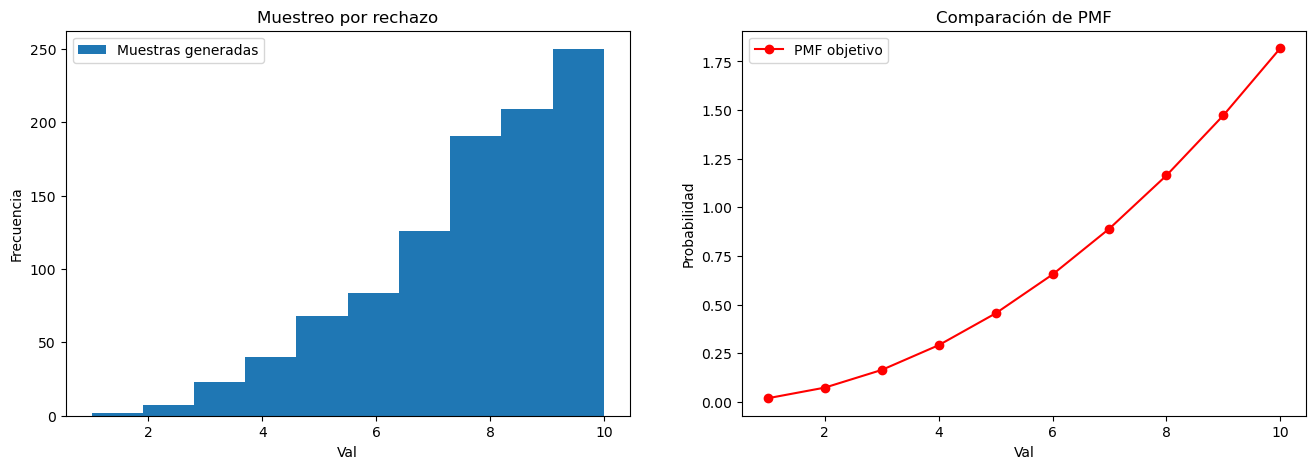

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.hist(muestras, bins=10, label="Muestras generadas")
plt.title("Muestreo por rechazo")
plt.xlabel("Val")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), [p(x) for x in range(1, 11)], 'ro-', label="PMF objetivo")
plt.title("Comparación de PMF")
plt.xlabel("Val")
plt.ylabel("Probabilidad")
plt.legend()

plt.show()

### Task 2
Suponiendo que es simple generar variables aleatorias con función de probabilidad acumulada Fi(x) para i de 1 a n,
tenemos la variable aleatoria V con una función de probabilidad acumulada.

![Captura de pantalla 2024-08-22 a las 16.36.31.png](<attachment:Captura de pantalla 2024-08-22 a las 16.36.31.png>)
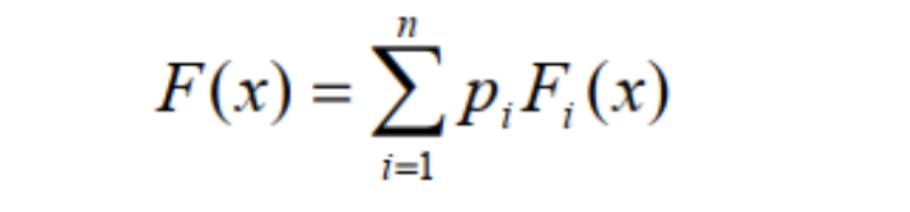

Donde pi constituye una distribución probabilística
1. Describa un algoritmo para generar V

Un algoritmo que genere la variable aleatoria V se puede definir de la siguiente manera:

Se definen funciones de probabilidad `F(x)` para un X de entrada, y una serie de probabilidades `P_i` que formen una distribución probabilística.

Con esto, se generan las variables aleatorias de manera uniforme, y se evalúan en la función de probabilidad acumulada `F(x)`. Si el valor de la variable aleatoria es menor o igual a `F(x)`, se retorna el valor de `i` que corresponde a la probabilidad `P_i` que se generó.

2. Demuestre que el algoritmo genera adecuadamente V
*Hint: Probablemente le sea de utilidad el método de composición*


In [8]:
def F1(x):
    return np.clip(x / 10.0, 0, 1)

def F2(x):
    return np.clip((x / 20.0)**2, 0, 1)

In [9]:
def generar_v(pi, distribuciones):
    index = np.random.choice(len(pi), p=pi) #seleccionar una distribución basada en las probabilidades
    return distribuciones[index]()

pi = [0.4, 0.6]  # Probabilidades para cada distribución
distribuciones = [
    lambda: np.random.uniform(0, 10),  # Distribución uniforme
    lambda: np.sqrt(np.random.uniform(0, 1)) * 20   # Distribución normal
]

print("Muestra generada:", generar_v(pi, distribuciones))

Muestra generada: 19.406787641746668


In [10]:
cantidad = 1000
samples = [generar_v(pi, distribuciones) for _ in range(cantidad)]

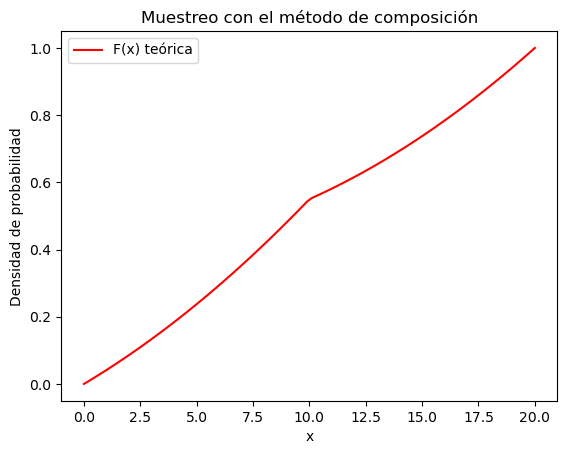

In [11]:
# Graficar histograma teórico

x = np.linspace(0, 20, 100)
F = pi[0] * F1(x) + pi[1] * F2(x)

plt.plot(x, F, 'r-', label="F(x) teórica")
plt.title("Muestreo con el método de composición")
plt.xlabel("x")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.show()



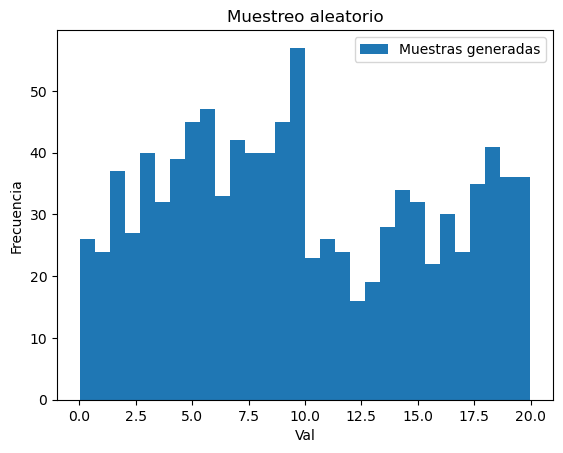

In [12]:
plt.hist(samples, bins=30, label="Muestras generadas")
plt.title("Muestreo aleatorio")
plt.xlabel("Val")
plt.ylabel("Frecuencia")
plt.legend()

plt.show()

### Task 3
Suponga que usted es gerente de proyecto en Inversiones Chileras S.A.; y debe elegir entre dos proyectos a realizar, la construcción de un Hotel o la construcción de de un Centro Comercial. Los flujos de caja esperados para cada proyecto son los siguientes:


Si el parámetro que quiere utilizar para comprar ambos proyectos es el Valor Presente Neto al 10% del costo de
capital.

1. Realice tres simulaciones para determinar cuál de los proyectos es el más rentable. Utilice 100, 1,000 y
10,000 iteraciones

In [13]:
flujos_hotel = [
    -800, 
    ('normal', -800, 50), 
    ('normal', -800, 100), 
    ('normal', -700, 150), 
    ('normal', 300, 200), 
    ('normal', 400, 200), 
    ('normal', 500, 200), 
    ('uniform', 200, 8440)
]

flujos_centro_comercial = [
    -900, 
    ('normal', -600, 50), 
    ('normal', -200, 50), 
    ('normal', -600, 100), 
    ('normal', 250, 150), 
    ('normal', 350, 150), 
    ('normal', 400, 150), 
    ('uniform', 1600, 6000)
]

def generar_flujo(dist):
    """
    Dado un flujo de caja, genera un valor aleatorio en base a la definición proporcionada.
    :param dist: int | tuple
    :return int
    """
    if type(dist) == int:
        return dist

    tipo, params = dist[0], dist[1:]

    if tipo == 'uniform':
        return np.random.uniform(*params)
    elif tipo == 'normal':
        return np.random.normal(*params)

In [14]:
def calcular_vpn(flujos, tasa_descuento=0.1):
    """
    Función para calcular el valor presente neto de un proyecto.
    :param flujos: list
    :param tasa_descuento: float
    :return: float
    """
    vpn = 0
    for t, flujo in enumerate(flujos):
        vpn += flujo / ((1 + tasa_descuento) ** t)
    return vpn

In [15]:
def simular_proyecto(flujo_caja, n, tasa_descuento):
    """
    Simula el VPN de un proyecto con n iteraciones.
    :param flujo_caja: list
    :param n: int
    :param tasa_descuento: float
    
    """
    vpns = []
    for _ in range(n):
        flujos_generados = [generar_flujo(flujo) for flujo in flujo_caja]
        vpns.append(calcular_vpn(flujos_generados, tasa_descuento))
    return np.array(vpns)


# Simulación con diferentes iteraciones
iteraciones = [100, 1000, 10000]
resultados = {}

for i in iteraciones:
    npv_hotel = simular_proyecto(flujos_hotel, i, 0.1)
    npv_centro_comercial = simular_proyecto(flujos_centro_comercial, i, 0.1)
    
    print(f"NPV Hotel con {i} iteraciones: {npv_hotel}")
    print(f"NPV Centro Comercial con {i} iteraciones: {npv_centro_comercial}")

    resultados[i] = {
        'hotel': npv_hotel,
        'centro_comercial': npv_centro_comercial,
        'mean_hotel': npv_hotel.mean(),
        'mean_centro_comercial': npv_centro_comercial.mean()
    }


NPV Hotel con 100 iteraciones: [ -922.67293603   525.4934187    536.1710801   -398.65346184
  1473.07200404  -694.65850778  1192.33530136  -739.68078142
 -1273.14612291  1041.86006647  1187.42593688   329.84697377
  1451.58221462 -1397.85552593 -2007.72776213  2718.83177972
  1025.55890701  2179.06804077  1568.40301776  1858.39455232
  -648.09127635  1947.01649806  1476.81942095  1714.74070436
   540.89239575  1673.00232119  -149.01519267   -60.64836934
  -475.48170724 -1521.22590781   713.0705098   1447.5988551
    86.91444866  -956.71554996  1869.28193391  -801.00284048
  1064.85310373  1070.43078664  1263.24113193  1638.66384721
   -71.69221741  1905.31206956   844.73753419  -369.32667613
 -1419.50928264  2025.55922047   827.2156635    987.61225614
  1636.57389257  -648.32868176  2000.38281482  1943.71054509
  1969.07443411  -132.54116824  1648.14593886    85.59203577
  -331.93439246  -233.92272424  2177.53097916 -1417.50126125
  1143.4795845   -481.51406676  -109.66102091  1223.703

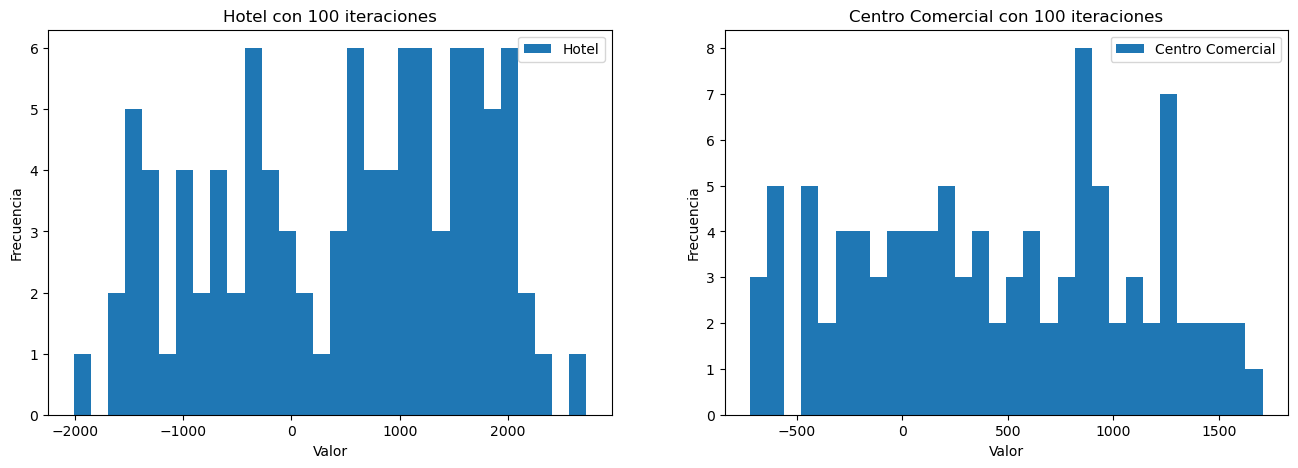

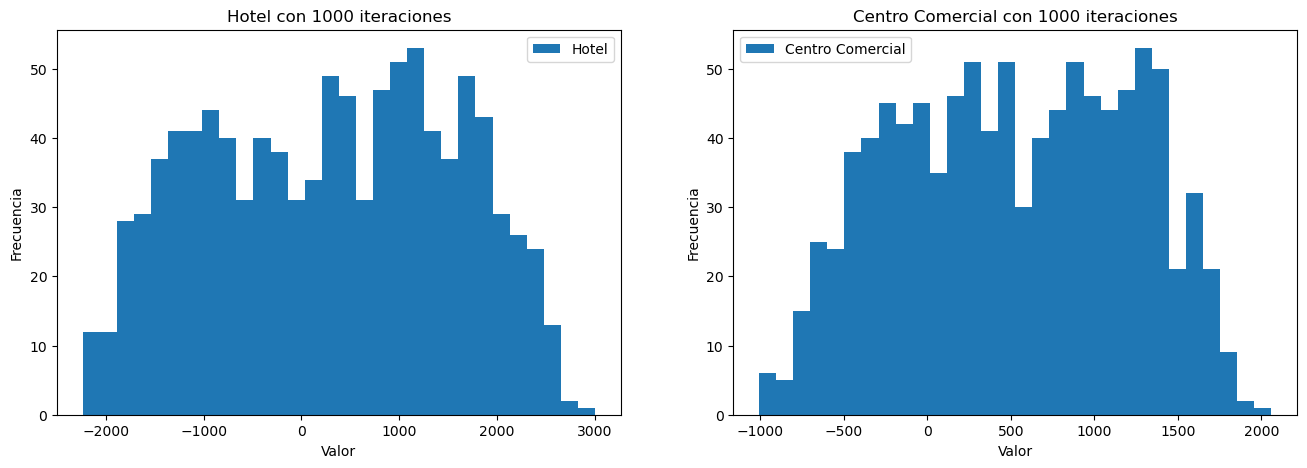

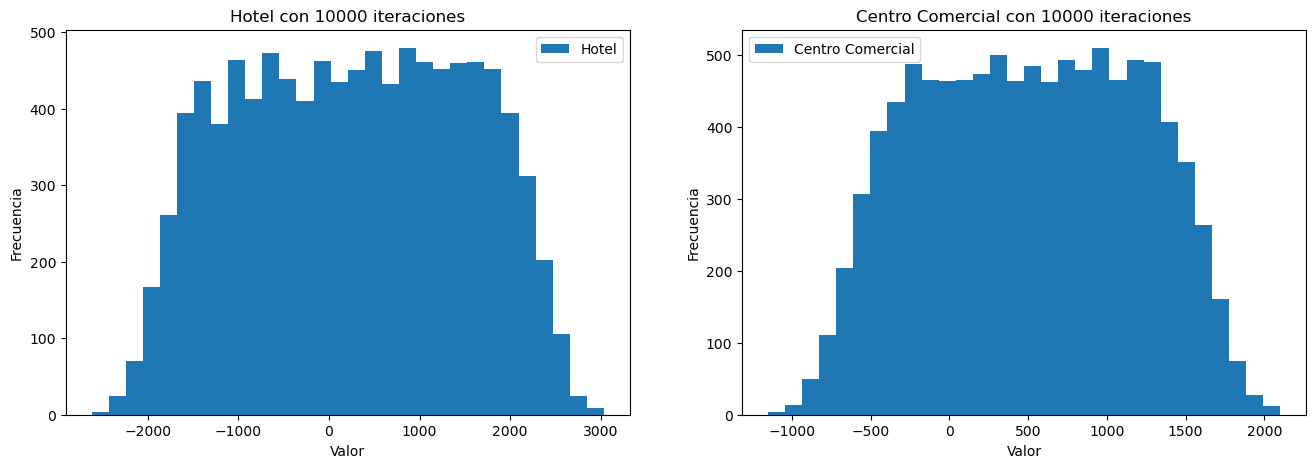

In [16]:
for i in iteraciones:
    plt.figure(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    plt.hist(resultados[i]['hotel'], bins=30, label="Hotel")
    plt.title(f"Hotel con {i} iteraciones")
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(resultados[i]['centro_comercial'], bins=30, label="Centro Comercial")
    plt.title(f"Centro Comercial con {i} iteraciones")
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")
    plt.legend()

    plt.show()